In [149]:
import pandas as pd

In [150]:
df = pd.read_csv("HVAC_Dynamic_Fuzzy_PID_2017_with_Target.csv")
df.head()

,Timestamp,Temperature_C,Humidity_%,CO2_ppm,Occupancy_Count,External_Temperature_C,Kp,Ki,Kd,Fuzzy_Adjustment_Factor,ISA_Optimization_Score,HVAC_Power_Consumption_kWh,Cooling_Heating_Output_C,Response_Time_s,Energy_Efficiency_%,User_Comfort_Index,HVAC_Efficiency_Class
0,2017-01-01 00:00:00,22.494481,44.945633,983.998649,12,7.752784,2.055758,0.113566,0.448615,0.850555,80.205161,8.944362,0.559912,7.191280,80.040141,8,2
1,2017-01-01 00:10:00,29.408572,43.316484,547.609596,26,14.710904,0.995900,0.205418,0.164713,1.056811,83.156046,3.079141,1.504367,23.742314,97.830274,6,2
2,2017-01-01 00:20:00,26.783927,37.046157,677.311755,37,31.403525,0.863097,0.916411,0.315834,0.991201,52.617556,7.651029,-0.278671,18.729310,93.696734,6,2
3,2017-01-01 00:30:00,25.183902,54.290667,930.624509,32,26.358835,1.077068,0.888923,0.287849,0.809292,66.412146,4.283124,1.569540,5.834288,85.825037,6,2
4,2017-01-01 00:40:00,19.872224,49.064966,785.671476,5,28.574897,2.340311,0.849772,0.492452,1.196332,55.214315,6.757243,0.545708,11.077815,89.098611,6,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp                   10000 non-null  object 
 1   Temperature_C               10000 non-null  float64
 2   Humidity_%                  10000 non-null  float64
 3   CO2_ppm                     10000 non-null  float64
 4   Occupancy_Count             10000 non-null  int64  
 5   External_Temperature_C      10000 non-null  float64
 6   Kp                          10000 non-null  float64
 7   Ki                          10000 non-null  float64
 8   Kd                          10000 non-null  float64
 9   Fuzzy_Adjustment_Factor     10000 non-null  float64
 10  ISA_Optimization_Score      10000 non-null  float64
 11  HVAC_Power_Consumption_kWh  10000 non-null  float64
 12  Cooling_Heating_Output_C    10000 non-null  float64
 13  Response_Time_s             1000

In [152]:
features = df.iloc[0:,1:5]

In [153]:
features

,Temperature_C,Humidity_%,CO2_ppm,Occupancy_Count
0,22.494481,44.945633,983.998649,12
1,29.408572,43.316484,547.609596,26
2,26.783927,37.046157,677.311755,37
3,25.183902,54.290667,930.624509,32
4,19.872224,49.064966,785.671476,5
...,...,...,...,...
9995,28.291872,65.081545,1161.820360,6
9996,28.770106,31.872558,998.259369,2
9997,29.360495,42.147939,415.564690,14
9998,22.769856,47.732800,720.803874,42


In [154]:
from sklearn.ensemble import IsolationForest

In [155]:
model = IsolationForest(n_estimators=150,contamination="auto",random_state=42)

In [156]:
model.fit(features)

,n_estimators,150
,max_samples,'auto'
,contamination,'auto'
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [157]:
df["Anomaly_score"] = model.decision_function(features)

In [158]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [159]:
df["Timestamp"]

0      2017-01-01 00:00:00
1      2017-01-01 00:10:00
2      2017-01-01 00:20:00
3      2017-01-01 00:30:00
4      2017-01-01 00:40:00
               ...        
9995   2017-03-11 09:50:00
9996   2017-03-11 10:00:00
9997   2017-03-11 10:10:00
9998   2017-03-11 10:20:00
9999   2017-03-11 10:30:00
Name: Timestamp, Length: 10000, dtype: datetime64[ns]

In [160]:
import matplotlib.pyplot as plt

In [161]:
df["is_anomaly"] = model.predict(features)
df["is_anomaly"] = df["is_anomaly"] == -1

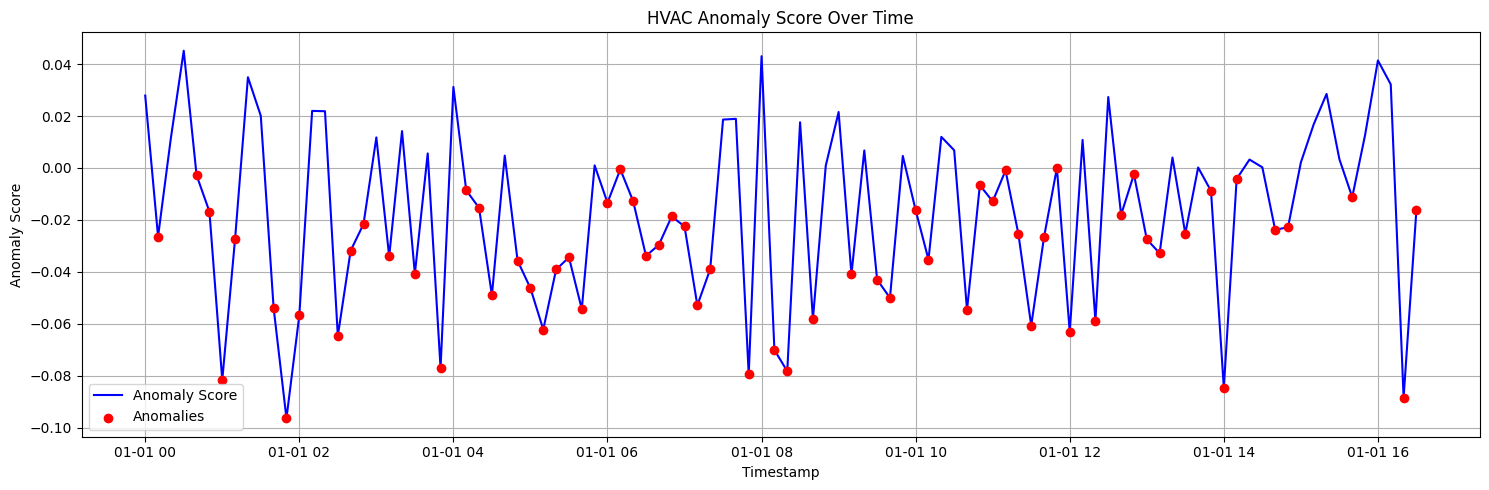

In [162]:
# Plot anomaly score over time
sample_df = df.iloc[0:100,:]
plt.figure(figsize=(15, 5))
plt.plot(sample_df["Timestamp"],sample_df["Anomaly_score"], label="Anomaly Score", color='blue')
anomalies = sample_df[sample_df["is_anomaly"]]
plt.scatter(anomalies["Timestamp"], anomalies["Anomaly_score"], color='red', label="Anomalies", zorder=5)

plt.title("HVAC Anomaly Score Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Anomaly Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["Anomaly_score"] = scaler.fit_transform(df[["Anomaly_score"]])

In [164]:
df["Extreme"] = (df["Anomaly_score"] < 0.5)

In [165]:
df["EXtreme"]=df["Extreme"].astype(int)

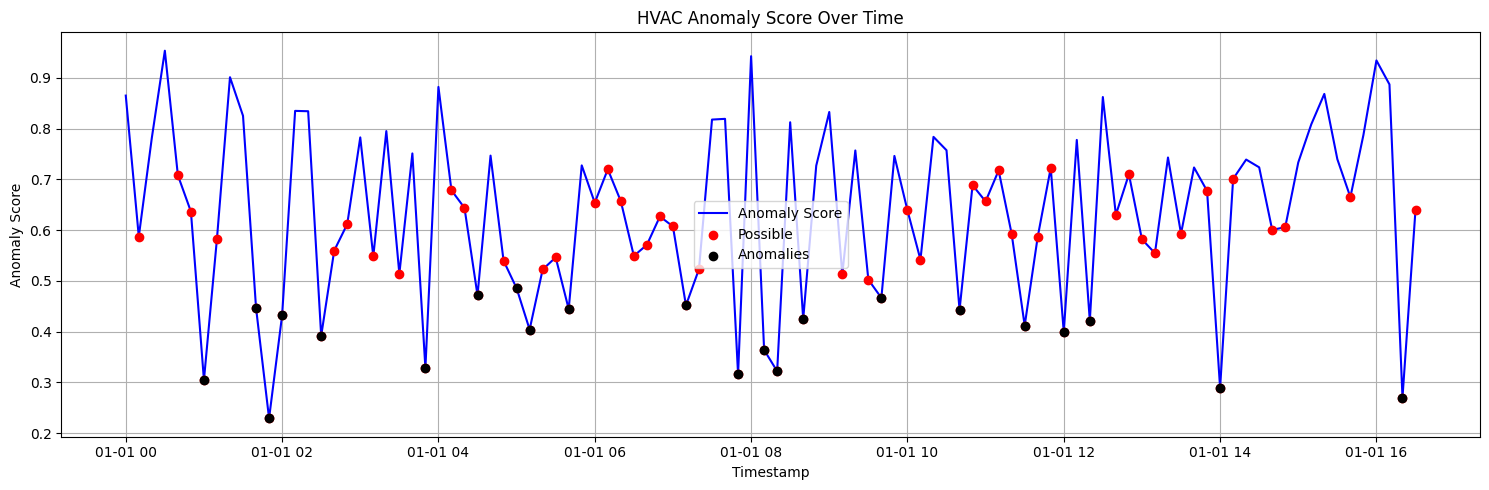

In [166]:
sample_df = df.iloc[0:100,:]
plt.figure(figsize=(15, 5))
plt.plot(sample_df["Timestamp"],sample_df["Anomaly_score"], label="Anomaly Score", color='blue')
anomalies = sample_df[sample_df["is_anomaly"]]
plt.scatter(anomalies["Timestamp"], anomalies["Anomaly_score"], color='red', label="Possible", zorder=5)

extreme_anomalies = sample_df[sample_df["Extreme"]]

plt.scatter(extreme_anomalies["Timestamp"], extreme_anomalies["Anomaly_score"], color='black', label="Anomalies", zorder=5)

plt.title("HVAC Anomaly Score Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Anomaly Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [167]:
df["is_anomaly"].astype(int).value_counts()

is_anomaly
1    6559
0    3441
Name: count, dtype: int64

In [168]:
df["HVAC_Efficiency_Class"].astype(int).value_counts()

HVAC_Efficiency_Class
2    7573
0    1414
1    1013
Name: count, dtype: int64

In [169]:
df["Extreme"].value_counts()

Extreme
False    7850
True     2150
Name: count, dtype: int64

In [ ]:

def transformation(x) :

    if(x==0) :
        return 1
    else:
        return 0


    

In [171]:
df["Y_actual"] = df["HVAC_Efficiency_Class"].apply(transformation)

In [172]:
df

,Timestamp,Temperature_C,Humidity_%,CO2_ppm,Occupancy_Count,External_Temperature_C,Kp,Ki,Kd,Fuzzy_Adjustment_Factor,...,Cooling_Heating_Output_C,Response_Time_s,Energy_Efficiency_%,User_Comfort_Index,HVAC_Efficiency_Class,Anomaly_score,is_anomaly,Extreme,EXtreme,Y_actual
0,2017-01-01 00:00:00,22.494481,44.945633,983.998649,12,7.752784,2.055758,0.113566,0.448615,0.850555,...,0.559912,7.191280,80.040141,8,2,0.864866,False,False,0,0
1,2017-01-01 00:10:00,29.408572,43.316484,547.609596,26,14.710904,0.995900,0.205418,0.164713,1.056811,...,1.504367,23.742314,97.830274,6,2,0.587234,True,False,0,0
2,2017-01-01 00:20:00,26.783927,37.046157,677.311755,37,31.403525,0.863097,0.916411,0.315834,0.991201,...,-0.278671,18.729310,93.696734,6,2,0.781558,False,False,0,0
3,2017-01-01 00:30:00,25.183902,54.290667,930.624509,32,26.358835,1.077068,0.888923,0.287849,0.809292,...,1.569540,5.834288,85.825037,6,2,0.953216,False,False,0,0
4,2017-01-01 00:40:00,19.872224,49.064966,785.671476,5,28.574897,2.340311,0.849772,0.492452,1.196332,...,0.545708,11.077815,89.098611,6,2,0.708024,True,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2017-03-11 09:50:00,28.291872,65.081545,1161.820360,6,17.914594,0.732633,0.887193,0.140705,0.894899,...,0.597147,29.070187,91.835387,9,2,0.388503,True,True,1,0
9996,2017-03-11 10:00:00,28.770106,31.872558,998.259369,2,26.516573,0.750189,0.488674,0.042593,1.082794,...,-0.270596,22.935699,91.242038,7,2,0.264305,True,True,1,0
9997,2017-03-11 10:10:00,29.360495,42.147939,415.564690,14,11.146859,0.667554,0.633647,0.090612,1.148152,...,-1.829108,27.666471,85.810408,7,2,0.368196,True,True,1,0
9998,2017-03-11 10:20:00,22.769856,47.732800,720.803874,42,19.255510,0.861337,0.841737,0.359427,1.131487,...,-0.102155,15.818534,84.171613,9,2,0.799590,False,False,0,0


In [177]:
accuracy = (abs(df["Y_actual"] == df["EXtreme"])).mean()

In [178]:
accuracy

0.7048

In [179]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df["Y_actual"],df["EXtreme"])
accuracy

0.7048

In [180]:
import joblib

joblib.dump(model,"model.pkl")

['model.pkl']

In [181]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

Confusion Matrix:
[[6742 1844]
 [1108  306]]


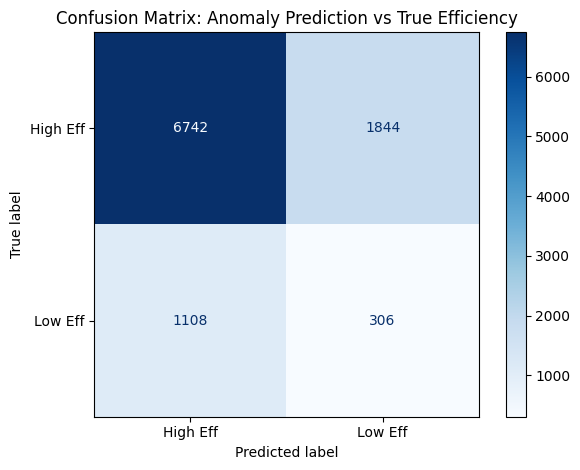

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(df["Y_actual"], df["EXtreme"], labels=[0, 1])

# Print matrix values
print("Confusion Matrix:")
print(cm)

# Optional: Display as labeled matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["High Eff", "Low Eff"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Anomaly Prediction vs True Efficiency")
plt.tight_layout()
plt.savefig("confusion_matrix_anomaly_efficiency.png")
plt.show()

